In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('./Training Data/Linear_X_Train.csv').values
y = pd.read_csv('./Training Data/Linear_Y_Train.csv').values.reshape(-1)
# y = (2*X+4).reshape(-1)
print(X.shape,y.shape)

(3750, 1) (3750,)


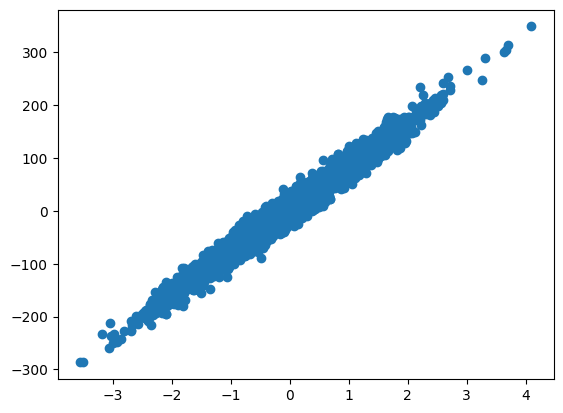

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
X = pd.read_csv('./Training Data/Linear_X_Train.csv').values
# y = pd.read_csv('./Training Data/Linear_Y_Train.csv').values.reshape(-1)
y = (2*X+4).reshape(-1)
print(X.shape,y.shape)

(3750, 1) (3750,)


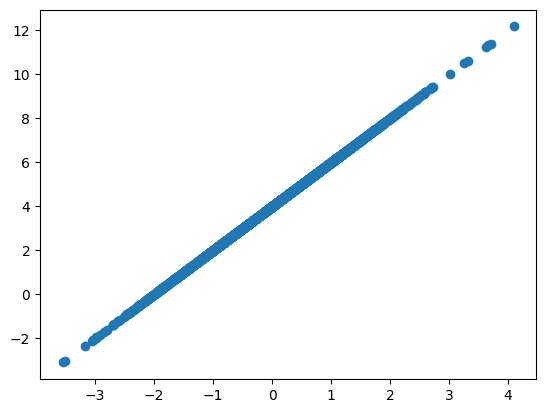

In [5]:
plt.scatter(X,y)
plt.show()

In [6]:
def hypothesis(x,w,w0):
    # ypred = []
    # for r in range(x.shape[0]):
    #     yp = w0 + np.sum(w * x[r])
    #     # for f in range(x.shape[1]):
    #     #     yp += w[f]*x[r,f]
    #     ypred.append(yp)
    # ypred = np.sum(x*w,axis = 1)+w0
    return x@w + w0

In [7]:
hypothesis(np.array([[1,2],[2,3],[3,4],[4,5]]),[2,1],10)

array([14, 17, 20, 23])

In [8]:
w = [2]
w0 = 1

In [9]:
def loss(x,w,w0,y):
    ypred = hypothesis(x,w,w0)
    return np.mean((ypred-y)**2)

In [10]:
loss(X,w,w0,y)

np.float64(9.0)

In [11]:
def gradientDescent(X,y,lr = 0.01,epochs = 100):
    w = np.random.random(size=(X.shape[1],))
    w0 = 1
    for e in range(epochs):
        ypred = hypothesis(X,w,w0)
        # grads = []
        # for j in range(X.shape[1]):
        #     # g = 0
        #     # for i in range(X.shape[0]):
        #     #     g += (ypred[i]-y[i])*X[i,j]

        #     # g /= X.shape[0]
        #     grads.append(np.mean((ypred - y)*X[:,j]))

        grads = (ypred-y)@X/X.shape[0]
        w = w - lr*np.array(grads)
        w0 = w0 - lr*np.mean(ypred-y)
    return w,w0        


In [12]:
w,w0 = gradientDescent(X,y,lr = 0.05,epochs=10000)
print(w,w0)

[2.] 3.9999999999999956


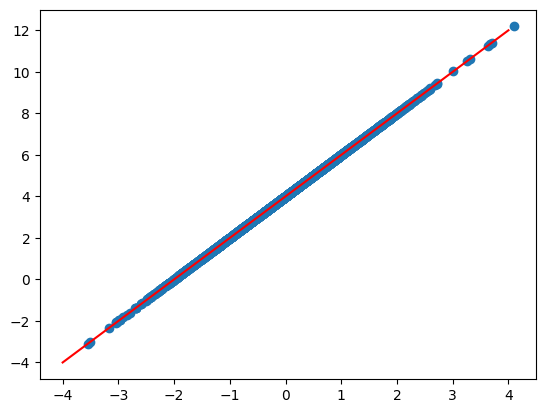

In [13]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,y)
plt.plot(x,hypothesis(x,w,w0),c='r')
plt.show()

In [14]:
class LinearRegression:
    def __init__(self,lr = 0.01):
        self.lr = lr
    def fit(self,X,y,epochs = 100):
        self.w, self.w0 = self.gradientDescent(X,y,self.lr,epochs)

    def hypothesis(self,x,w,w0):
        return w.dot(x.T) + w0

    def loss(self,x,w,w0,y):
        ypred = self.hypothesis(x,w,w0)
        return np.mean((ypred-y)**2)

    def predict(self,X):
        return self.hypothesis(X,self.w,self.w0)

    def gradientDescent(self,X,y,lr = 0.01,epochs = 100):
        w = np.zeros(shape=(X.shape[1],))
        w0 = 1
        self.loss_e = [self.loss(X,w,w0,y)]
        for e in range(epochs):
            ypred = self.hypothesis(X,w,w0)
            
            # i = np.random.randint(X.shape[0])
            # grads = (ypred[i]-y[i])*X[i]
            
            grads = grads = (ypred-y)@X/X.shape[0]
            w = w - lr*grads
            w0 = w0 - lr*np.mean(ypred-y)

            self.loss_e.append(self.loss(X,w,w0,y))
            
        return w,w0

In [32]:
clf = LinearRegression()
clf.fit(X,y,epochs=500)

In [33]:
clf.w

array([1.98169443])

In [34]:
clf.w0

np.float64(3.977303245161423)

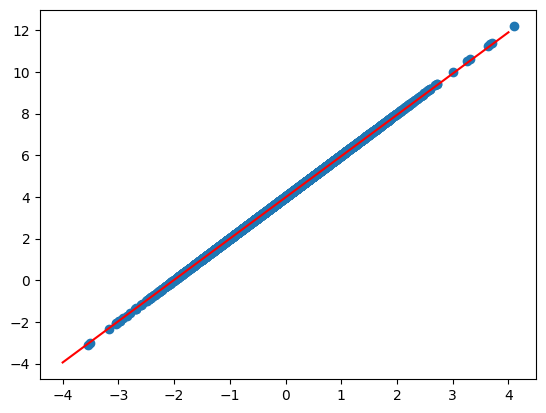

In [18]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,y)
plt.plot(x,clf.predict(x),c='r')
plt.show()

In [19]:
clf.loss_e

[np.float64(12.489069760872692),
 np.float64(12.250143335565465),
 np.float64(12.015790111949572),
 np.float64(11.78592250844054),
 np.float64(11.5604546217027),
 np.float64(11.339302194470612),
 np.float64(11.122382583987932),
 np.float64(10.909614731051775),
 np.float64(10.700919129651009),
 np.float64(10.496217797187038),
 np.float64(10.29543424526594),
 np.float64(10.098493451050913),
 np.float64(9.905321829164377),
 np.float64(9.71584720412907),
 np.float64(9.529998783337872),
 np.float64(9.347707130542165),
 np.float64(9.168904139848795),
 np.float64(8.993523010215862),
 np.float64(8.821498220437753),
 np.float64(8.652765504610054),
 np.float64(8.48726182806511),
 np.float64(8.32492536376919),
 np.float64(8.165695469172418),
 np.float64(8.009512663502766),
 np.float64(7.856318605495592),
 np.float64(7.70605607155035),
 np.float64(7.55866893430629),
 np.float64(7.414102141629096),
 np.float64(7.272301696000564),
 np.float64(7.133214634303626),
 np.float64(6.996789007995062),
 np.f

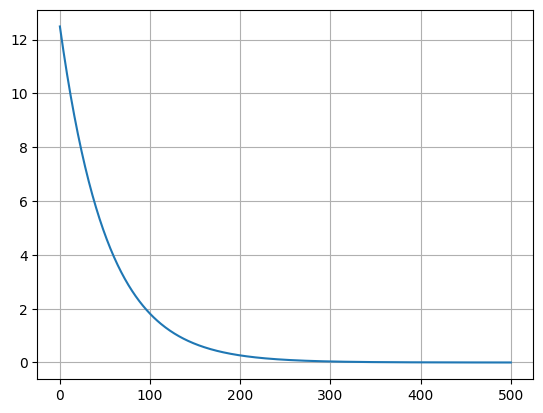

In [20]:
plt.plot(clf.loss_e)
plt.grid()
plt.show()

In [21]:
Xnew = np.stack([X[:,0],np.ones(X.shape[0])],axis=1)
Xnew

array([[-0.28930742,  1.        ],
       [-0.58880963,  1.        ],
       [ 1.02750749,  1.        ],
       ...,
       [-0.30516366,  1.        ],
       [ 1.67583291,  1.        ],
       [-0.49175724,  1.        ]], shape=(3750, 2))

In [22]:
w = np.linalg.inv(Xnew.T@Xnew)@Xnew.T@y

In [23]:
w

array([2., 4.])

In [24]:
clf = LinearRegression()
clf.fit(X,y)
